# MATH 482 - Spring 2025
## Combinatorial Algorithms
Param Desai<br><br>
**Due:** Friday, February 21, 2025 by 11:59 PM
<hr>

# Homework Assignment \#3: Divide and Conquer 

<hr>

## Goals:

In this assignment you will practice:

- implementing the {\it divide and conquer strategy} for algorithm design, 
- writing and solving recursive relations to estimate the algorithm the running time of a recursive algorithm, and
- use recursion to generate fractals.

## Directions:

Write the solutions of the problems below and upload the document to canvas by the due date.

For **Problem 3** please write clear and {\bf concise} answers (*i.e.*, most questions can be answered with a couple of sentences, there's no need to write full/extended paragraphs, and any calculations can be carried out in a few lines).


## Koch's Curve

Starting with an equilateral triangle of side length $s$, *Koch's curve* (also known as the *snowflake curve*) is generated by recursively replacing the *middle third* of each side with two sides of length $s/3$ that form a new equilateral triangle with its base removed (that middle third). The procedure is applied recursively to each of the four resulting segments of size $s/3$...

#### <center>Snow Flake Curve</center>

| | | | |
|:-:|:-:|:-:|:-:|
|![First Image](frames/KochCurve000s.png) | ![Second Image](frames/KochCurve001s.png)| ![First Image](frames/KochCurve002s.png) | ![First Image](frames/KochCurve003s.png) |
<br>

## <tt>import</tt> Packages Required for all Problems

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

## Problem \#1. Implementation

- Write a *recursive* procedure named <code>KochSide(p_left, p_right, k)</code> that takes as input the left and right endpoints, <code>p_left</code> and <code>p_right</code>, of one side of an equilateral triangle (of any line segment really...), and the number of iterations to apply, <code>k</code>, and returns the plot of the curve that results from applying the above procedure to that side of the triangle <code>k</code> times.

- Test your code for <code>p_left =</code> $\left[ \frac{1}{2}, \frac{1}{2} \right]$ and <code>p_right =</code> $\left[\frac{1  + \sqrt{3}}{2}, 1 \right]$, and <code>k = </code> $1, \dots, 6$.

*Suggestions/Hints:*
- Your implementation of <code>KochSide(p_left, p_right, k)</code> should start with the base case: what should your code do when <code>k = 0</code>?
- For </code>k > 0</code>, find the three vertices of the new triangle: two of them lay along the side/line segment you are iterating on, and the other can be found knowing it is the third vertex of an equilateral triangle.
- The two original endpoints along with the three new vertices define four new segments to apply the procedure to </code>k - 1</code> times.
- Inputing/representing <code>p_left</code> and <code>p_right</code> as 2-d vectors and using a rotation matrix,<br><br>
$$R_{\theta} = \begin{pmatrix} \cos{\theta} & - \sin{\theta}  \\[0.08in] \sin{\theta} & \ \ \, \cos{\theta} \end{pmatrix},$$
can be very helpful for finding the vertices of the new triangle.

<hr>

In [ ]:
def KochSide(p_left, p_right, k):
    
    if k == 0: # base case
        # resolve base case
        # draw the line
       plt.plot(p_left,p_right) 
        
    else: # calculate new vertices and make recursive calls to KochSide for k-1 iterations
       
        Theta = np.pi / 3
        Rotation_Matrix = np.array([
        [np.cos(Theta), -np.sin(Theta)],
        [np.sin(Theta),  np.cos(Theta)]
                    ])
        
        # R = (scaling factor = height of new equilateral triangle)*Rotation matrix
        Side_Vector = (p_right-p_left)
        Side = linalg.norm(Side_Vector)
        
        
        R = (math.sqrt(3)/2)*(Side/3)*Rotation_Matrix
        p1 = p_left
        # p2 = one thrid from p_left in the direction of p_right
        p2 = Side_Vector/3 + p1
        # p3 = vertex of new triangle (not on original line)
        p3 = (p_left+p_right)/2 + R
        # p4 = two thrids from p_left in the direction of p_right
        p4= Side_Vector*(2/3) + p1
        p5 = p_right
        
        # recursive call
        KochSide(p1,p2,k-1)
        # recursive call
        KochSide(p2,p3,k-1)
        KochSide(p3,p4,k-1)
        KochSide(p4,p5,k-1)
        # ...
        # recursive call
        
    # plotting commands
    # you may need to adjust the axis for different values of p_left and p_right
    
    plt.axis('square')
    plt.axis([0.42, 1.4, 0.4, 1.1])

###########################################################################################

# Test Points

p_left = np.array([0.5,0.5])
p_right = np.array([0.5*(1.0 + math.sqrt(3.0)), 1.])

# Test

KochSide(p_left, p_right, 2)

<hr>

## Problem \#2. Full Curve

**Full Koch's Curve:** write a function named <code>KochCurve(p_left, p_top, p_right, k)</code> that takes as input the three vertices of an equilateral triangle, <code>p_left</code>, <code>p_top</code> and <code>p_right</code>, and the number of iterations to apply to every side <code>k</code>, and returns an image of the full snowflake curve by calling the procedure <code>KochSide</code> for every pair of vertices (in the correct order). Display the snowflake curve after <code> k = </code> 4 iterations.

<hr>

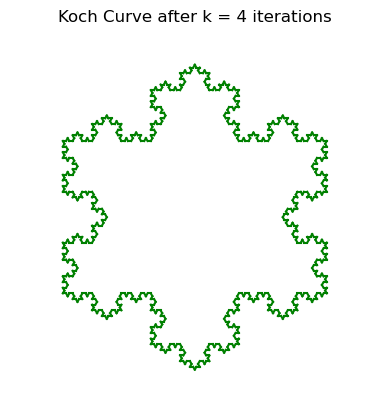

In [29]:
def KochCurve(p_left, p_top, p_right, k):
    
    # call Koch side for each of the three sides of the triangle
    
    # KochSide(p_left,..., k)
    # KochSide(...
    # ...
    
    # plotting commands
    # adjust as needed
    
    plt.axis('square')
    plt.axis([-0.2, 1.2, -0.4, 1.0])
    
    # if you want to title and save your snowflakes... you'll need to create a folder naked frames
    # plt.title('Koch Curve after k = %d iterations' %k)
    # plt.axis('off')
    # outfile = "frames/KochCurve%0.3d.png" % k
    # plt.savefig(outfile)

###########################################################################################

# Test Points

p_left = np.array([0,0])
p_top= np.array([0.5,0.5*np.sqrt(3.0)])
p_right= np.array([1.0,0])

## Test

#KochCurve(p_left, p_top, p_right, 4)

<hr>

## Problem \#3. Analysis

Analysis of the procedure <code>KochSide(p_left, p_right, k)</code>: 

1. Briefly describe the problem your implementation of <code>KochSide(p_left, p_right, k)</code> solves (there's no need to mention Koch or the curve, just the math problem, *e.g*, given two points $p_{\text{left}}$ and $p_{\text{right}}$, replace the middle third of the segment with...)
1. Briefly describe the subproblems the *divide* phase of the algorithm breaks the main problem into. What is the depth of the recursion tree?
1. When does the algorithm stop dividing and start solving the subproblems (for what value of <code>k</code>)?
1. How does the recursive algorithm solve the subproblems?
1. How many recursive calls does <code>KochSide(p_left, p_right, k)</code> generate?
1. What lines/part of your code implement the {\it divide} portion of the solution strategy? 
1. What lines/part implement the *conquer* portion?
1. How are the solutions of the subproblems combined into the solution of the full problem?
1. Assuming the base case and the *divide* phase of the recursive routine take constant (finite) amounts of time $c_1$ and $c_2$ respectively to complete, write a recursive relation to compute the running time, $T(k)$, of the algorithm when <code>k</code> iterations are applied to one side of the triangle.
1. Solve the recursive relation to find $T(k)$.
